<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge. Part 1: Data Cleaning and Feature Engineering

### Lo kok Fu - DSIF 2

## Problem Statement

We are tasked with creating a regression model to best predict salesprice based on the Ames Housing Dataset. We will conduct an analysis to the datasets provided and provide a recommendation of the best regression model and features selection to best predict the pricing of a house sale price. 
This model will enable home owners or property investors to accurately predict sale prices based on what kind of features the houses have or to improve/enhance to realise the higher potential values of the houses. 

The selection of the model represented will be based on the RMSE score and overfitness %.

## Executive Summary

This project aims to analyse and provide for the best Linear Regression model to best accurately predict the Saleprice of houses based on  Ames Housing historical data provided. The Data were grouped into 4 categories, Namely: 1) Ordinal , 2) Nominal, 3) Discrete, 4) Continous. These categories enabled us to differentiate their data types into qualitative or quantative data.

During our data cleaning process, A total of 9822 null values were discovered in the train dataset. We had either filled in 0 or None value for numerical columns and None for catogerical columns. We have also imputed the missing values of lot Frontage with the mean values. We have also removed/corrected the following obvious outliers: Gr Liv Area, Garage Yr Built, 1st Flr SF, Total Bsmt SF Lot, Area Wood Deck, SF Misc Val. Garage yr built: value of 2207 converted to 2007.

Finally for Feature Engineering, we did a feature mapping for the Ordinal Features, assigning numerical values to its grade and then after we conducted an one hot encoding for the Nominal Features. Similarly for the test data sets, similar changes were implented to the test sets.

For Features Selection, we employed the feature selection using SelectkBest. it was discovered that this result was identical to the sorted correalation list of features to the Saleprice. therefore there was no need to employ the SelectkBest method for feature selection. In the initial feature selection plan, we planned for 2 sets of features to model, namely: 1) 10 most Important Features, 2) 50 most Important features. however after running the Linear Regression models on the features, and experimenting with the no. of features to be included. We discovered that 20 most important Features returns us the best results. Therefore we included the 3rd feature selection of 20 Most Important Features for our analysis comparison.

Our Modelling utilised the Linear Regression models with Ridge and Lasso regularisation to observe which will return us the best results basing on the RMSE scores generated. we also employed gridsearchCV to give us the best parameter to impute for our model best parameters. it was observed that the features with 50 features give us not so ideal results and the 10 features was returning us average results. We then decided to insert features of 20 to further analyse the results. Hence it was deduced that the model with 20 most important features, using Ridge Regression gave us the best ideal result with no overfitting scores. 

## Contents:
1. [Import Library](#Import-Library)
2. [Data Dictionary](#Data-Dictionary)
3. [Data Import and Review](#Data-Import-and-Review)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Data Cleaning](#Data-Cleaning) 
6. [Categorial Cleaning and Imputation](#Categorial-Cleaning-and-Imputation)
7. [Feature Engineering](#Feature-Engineering)
8. [Export Cleaned Data](#Export-Cleaned-Data)

## Data

- train.csv -- this data contains all of the training data for our model.
- test.csv -- this data contains the test data for our model. You will feed this data into your regression model to make predictions. * The is no Saleprice column in the test set.
- sample_sub_reg.csv -- An example of a correctly formatted submission (with a random number provided as predictions for SalePrice. Ensure that our submission matches this format.
- train_clean.csv -- cleaned version of the train.csv
- test_clean.csv -- cleaned version of the test.csv
- submission.csv -- predicted values using the best ML model 

## 1. Import Library

In [1]:
# import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Dictionary

refer to: https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data for the complete description of the datas. generally the datas are categorised into 4 categories. 
1. Ordinal
2. Nominal
3. Continous
4. Discrete

## 3. Data Import and Review

In [2]:
# import data
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

### 3.1 Review dataset

In [3]:
#display first 5 rows of df dataset
train_df.head() 

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# display shape of train_df dataset
print(train_df.shape)
# df has 2051 rows and 81 columns

(2051, 81)


In [5]:
# display shape of test_df dataset
print(test_df.shape)
# df has 878 rows and 80 columns. this is different from the train_df. reason is there is no 'Saleprice' column

(878, 80)


In [6]:
#explore dtypes and any null values
train_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
null_sum = train_df.isnull().sum().sort_values(ascending = False)
print(null_sum.head())

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
dtype: int64


In [8]:
train_df.isnull().sum().sum()
# totoal of 9822 null values in the data set

9822

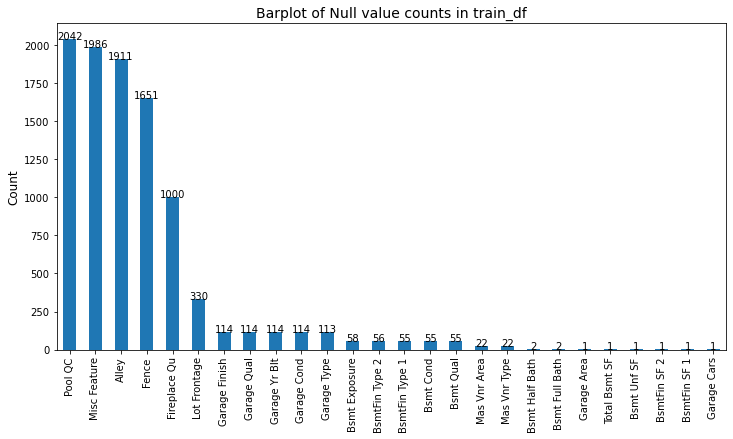

In [9]:
# plot bar chart of null values for overview
num_sum = null_sum [null_sum > 0]

plt.figure(figsize = (12,6))
plt.title( 'Barplot of Null value counts in train_df', fontsize = 14)
plt.xticks(rotation = 45)
plt.ylabel('Count', fontsize = 12)

for index, value in enumerate(num_sum):
    plt.text(index, value,  str(value), horizontalalignment='center')

num_sum.plot.bar();


- There are multiple columns with missing values. we shall investigate these columns later. 
- We will be catogorising the columns in their variable for in-depth exploration and cleaning. nominal, ordinal, discrete, continous variables

## 4. EDA

### 4.1 Explore numeric train data correlation to saleprice

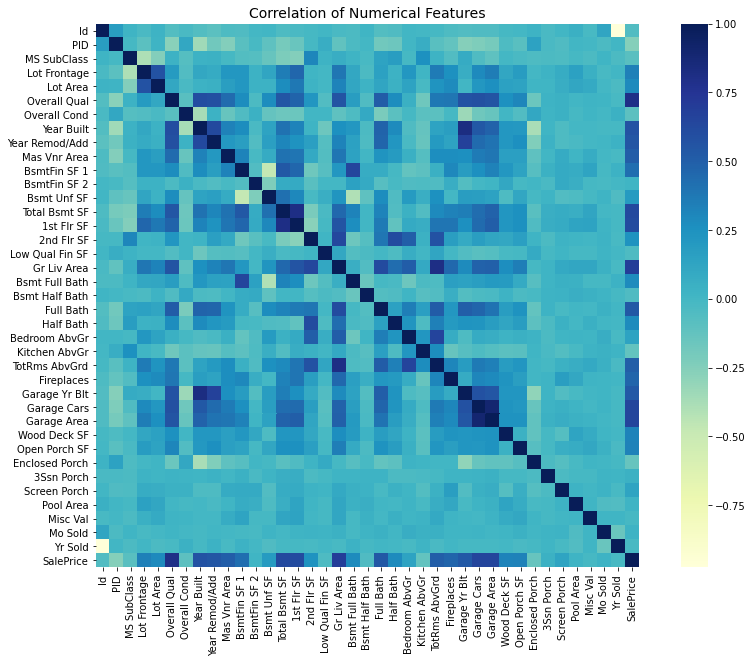

In [10]:
# explore correlation of features
cor_train = train_df.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cor_train, square=True,cmap="YlGnBu")
plt.title('Correlation of Numerical Features', fontsize =14);

- PID and Id variable which its an identification number is strongly negatively corrleated to Sales price. This column is assessed to not affect our modelling and We will treat is as a continous variable. Hence, we will be dropping this column.
- We will be also dropping the Id column as this is used to id the rows of the train df which is of no importance to our predictions.
- By obesrving the dark blue boxes in the heatmap, We can observe that there is strong correlation between:
1. Overall Quality and Saleprice,
3. Gr Liv Area and Saleprice
4. Gr Liv Area and TotRms AbvGrd
5. 1stFlr SF and Total Bsmt SF
6. Garage Yr blt and Year Built
7. Garage Cars and Garage Area


In [11]:
# Dropping 'PID' and 'Id' column in train_df
train_df.drop(['PID', 'Id'], axis = 1, inplace = True)

In [12]:
# Dropping 'PID'  column in test_df, we do not drop Id col from the test set as we will need this col for reference later
test_df.drop(['PID'], axis = 1, inplace = True)

In [13]:
# Check
print(train_df.shape)
print(test_df.shape)

(2051, 79)
(878, 79)


### 4.2 Pair Plot of Identified strong correlation numeric Features 

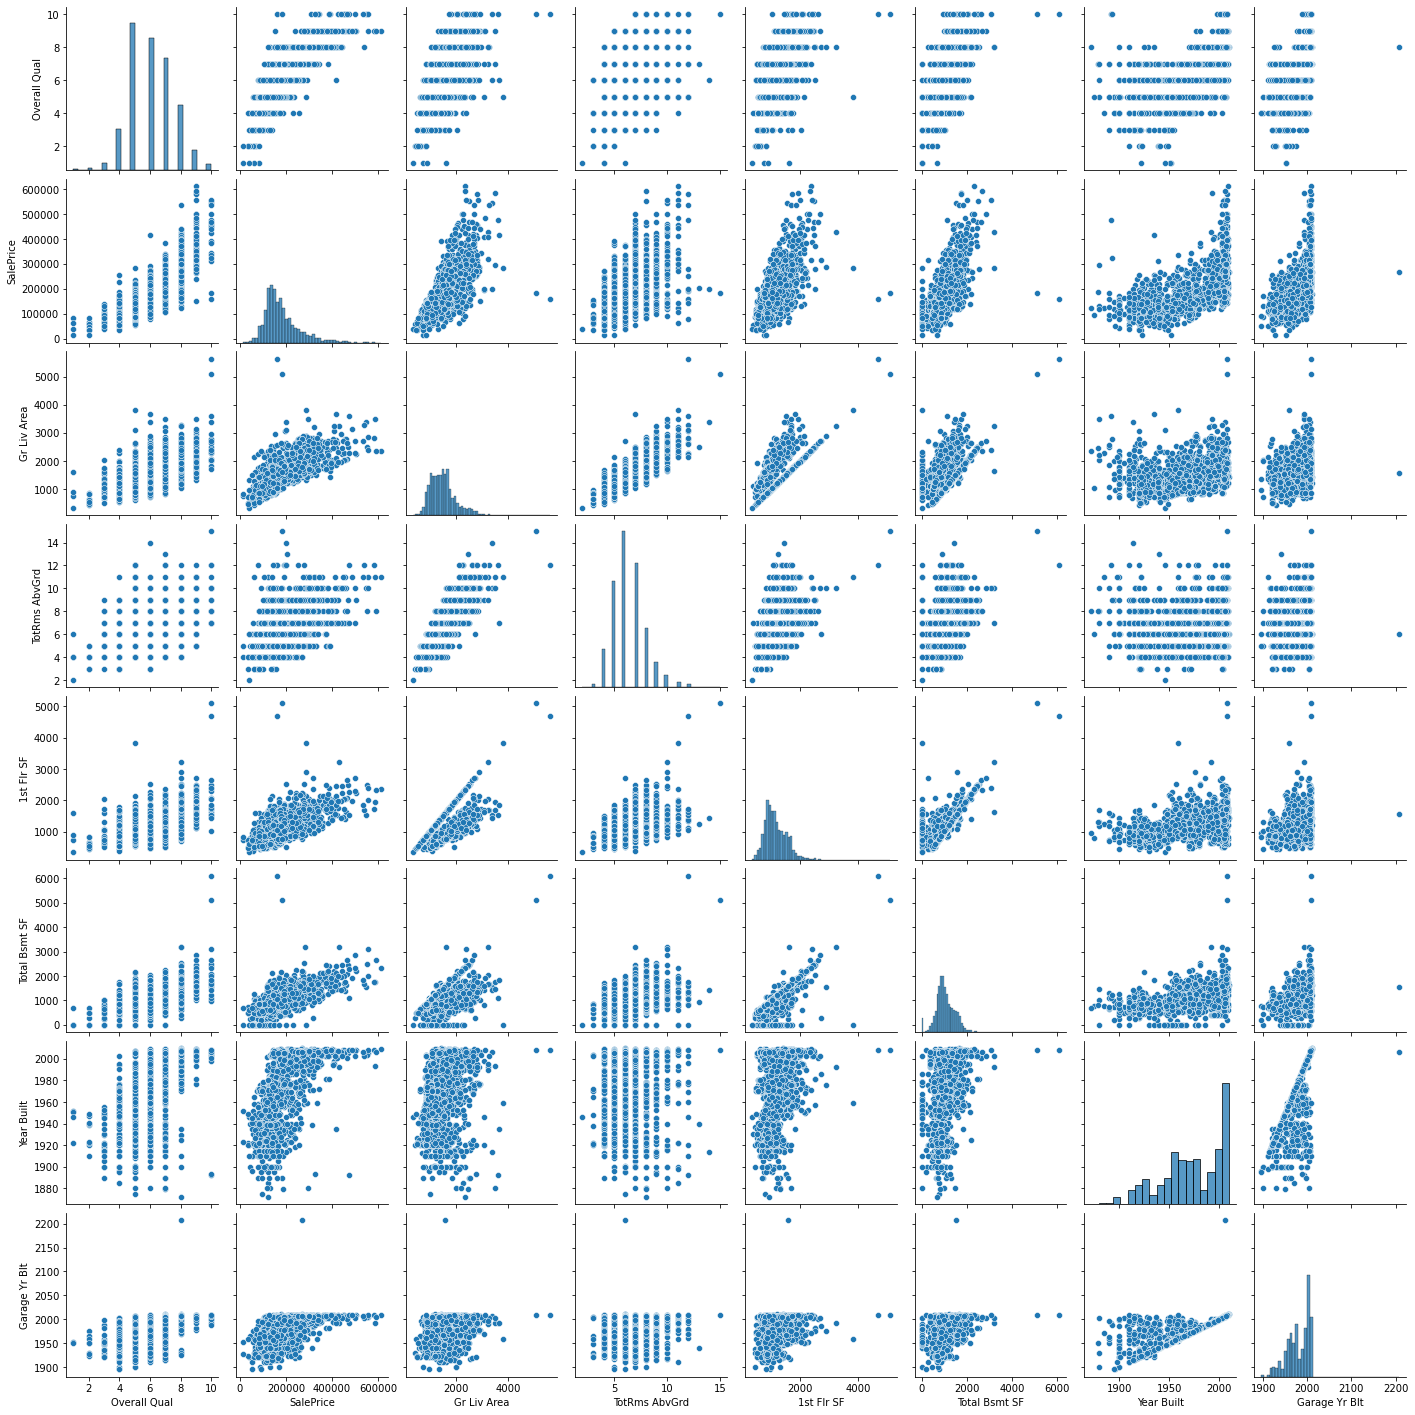

In [14]:
# plot pairplot to explore strong correlation numeric train data
numeric_train_features = ['Overall Qual', 'SalePrice', 'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Total Bsmt SF', 'Year Built', 'Garage Yr Blt']
sns.pairplot(train_df[numeric_train_features] );


- We can observe Gr Liv Area has a strong correlation to Salesprice
- We can also observe  a Linear Relationship between TotRms AbvGrd and Gr Liv Area.
- There are also obvious Outliers to be corrected.

With these observations, we are confident to build a predictive model that will assist us to provide a accurate prediction to the Sale price as stated in the problem statement. The data provided are usefull to us but there are some data cleaning and imputation needed to be conducted in order for us to proceed. we will be utlising models and test the predictions scores and will select the best model with the lowest RMSE score.


### 4.3 Plot BoxPlot for overview of Outliers

In [15]:
# setting numeric features columns
quant =[f for f in train_df.columns if train_df.dtypes[f]!=("object")]

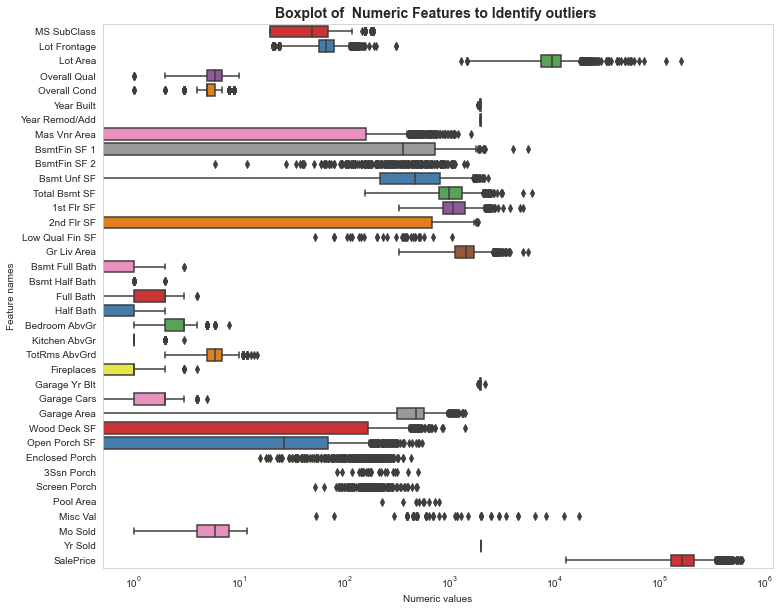

In [16]:
# Plotting numeric features box plot to identify outliers
sns.set_style("whitegrid")
plt.subplots(figsize=(12, 10))

ax = sns.boxplot(data=train_df[quant] , orient="h", palette="Set1")
ax.set_xscale("log")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set_title("Boxplot of  Numeric Features to Identify outliers ", fontsize = 14, fontweight = 'heavy');


In [17]:
# identified outliers
outliers = train_df[['Gr Liv Area', 'Garage Yr Blt', '1st Flr SF', 'Total Bsmt SF', 'Wood Deck SF', 'Misc Val']]

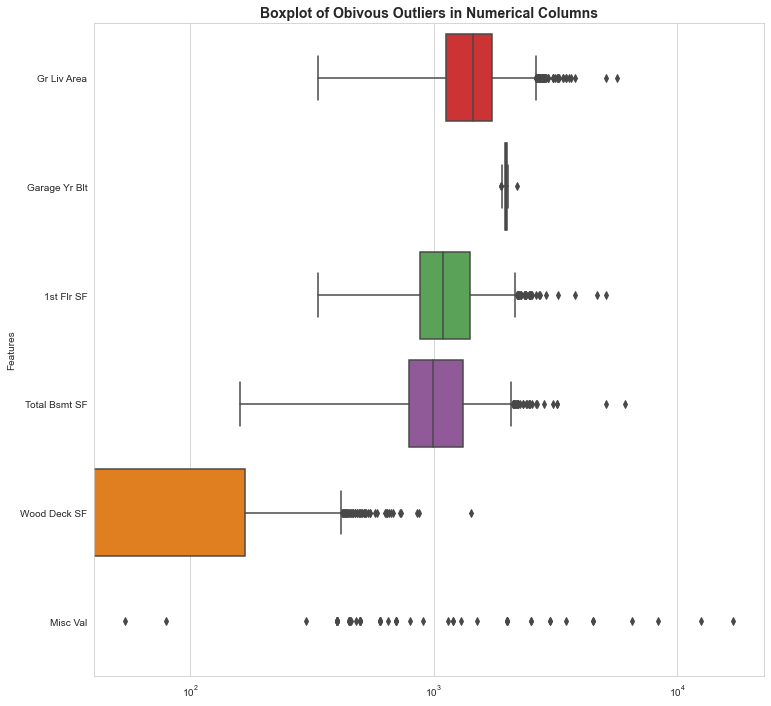

In [18]:
# plotting boxplot of identified outliers
f, ax = plt.subplots(figsize=(12, 12))
ax.set_xscale("log")
ax = sns.boxplot(data=outliers , orient="h", palette="Set1")
ax.set_title('Boxplot of Obivous Outliers in Numerical Columns', fontsize = 14, fontweight = 'heavy')
ax.set(ylabel = 'Features');

### Outliers

We notice obvious outliers in the following columns:
1. Gr Liv Area
2. Garage Yr Built
3. 1st Flr SF
4. Total Bsmt SF
5. Lot Area
6. Wood Deck SF
7. Misc Val

We shall investigate them futher and conduct cleaning as necessary.

## 5. Data Cleaning

### 5.1. Gr Liv Area, 1st Flr SF, Total Bsmt SF

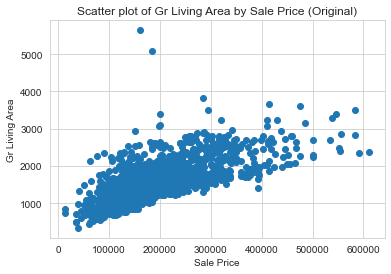

In [19]:
plt.scatter(train_df['SalePrice'],  train_df['Gr Liv Area'])
plt.xlabel('Sale Price')
plt.ylabel('Gr Living Area')
plt.title('Scatter plot of Gr Living Area by Sale Price (Original)');

In [20]:
# noticed outliers in Grd liv Area vs SalePrice
Lv_area_4000 = train_df[train_df['Gr Liv Area'] > 4000]
Lv_area_4000

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [21]:
# we shall drop this 2 row variables from train dataset as they are unusual sales as stated in the code book.
train_df.drop([960, 1885], inplace = True)

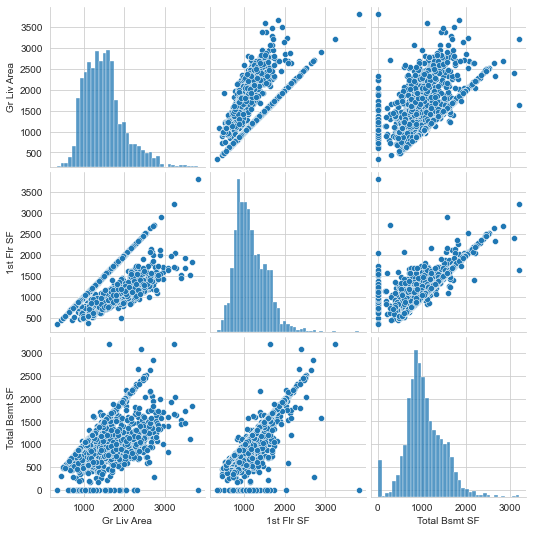

In [22]:
# outliers were removed form 1st Flr SF and Total Bsmt SF when we dropped the 2 rows from Gr Liv Area
gr_outliers = ['Gr Liv Area','1st Flr SF','Total Bsmt SF']
sns.pairplot(train_df[gr_outliers]);

### 5.2. Garage Yr Built


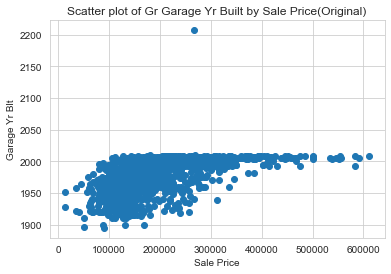

In [23]:
# noticed obvious outlier in Garage Yr Blt vs SalePrice
plt.scatter(train_df['SalePrice'],  train_df['Garage Yr Blt'])
plt.xlabel('Sale Price')
plt.ylabel('Garage Yr Blt')
plt.title('Scatter plot of Gr Garage Yr Built by Sale Price(Original)');

In [24]:
gar_yr_above_2020 = train_df[train_df['Garage Yr Blt'] > 2010]
gar_yr_above_2020
#identified index 1699 where Garage Yr Blt is larger than yr 2010

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [25]:
# retrieve Yr built and garage yr built to investigate
gar_yr_above_2020[['Year Built','Garage Yr Blt']]


,Year Built,Garage Yr Blt
1699,2006,2207.0


In [26]:
# Garage Yr Blt stated is 2207. this should be a typo error as yr 2207 is way too forward to the future. 
# we will assumed this value to be 2007 since the house was built in 2006

train_df.loc[1699,'Garage Yr Blt'] = 2007

In [27]:
# check 
train_df.loc[1699,'Garage Yr Blt']

2007.0

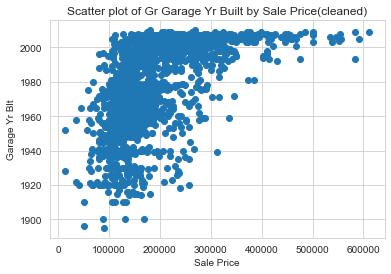

In [28]:
plt.scatter( train_df['SalePrice'], train_df['Garage Yr Blt'] )
plt.title('Scatter plot of Gr Garage Yr Built by Sale Price(Cleaned)')
plt.xlabel('Sale Price')
plt.ylabel('Garage Yr Blt')
plt.title('Scatter plot of Gr Garage Yr Built by Sale Price(cleaned)');
# no more outlier

### 5.3. Lot Area

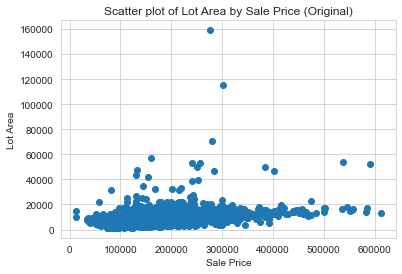

In [29]:
plt.scatter(train_df['SalePrice'],  train_df['Lot Area'])
plt.xlabel('Sale Price')
plt.ylabel('Lot Area')
plt.title('Scatter plot of Lot Area by Sale Price (Original)');

In [30]:
# find outliers of lot area more than 60000
Lot_above_outlier = train_df[train_df['Lot Area'] > 60000]
Lot_above_outlier

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000
1854,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2006,WD,280000


In [31]:
# we will remove these 3 rows of outliers
train_df.drop([471,694, 1854], inplace = True)

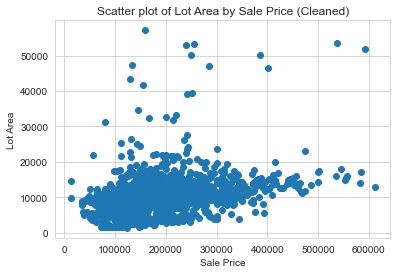

In [32]:
#plot scatterplor of lot area to saleprice for overview
plt.scatter(train_df['SalePrice'], train_df['Lot Area'])
plt.xlabel('Sale Price')
plt.ylabel('Lot Area')
plt.title('Scatter plot of Lot Area by Sale Price (Cleaned)');

### 5.4. Wood Deck SF

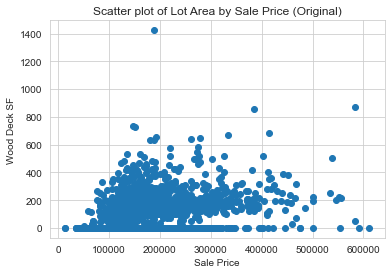

In [33]:
#investigate wood deck sf by sale price for outlier
plt.scatter(train_df['SalePrice'], train_df['Wood Deck SF'])
plt.xlabel('Sale Price')
plt.ylabel('Wood Deck SF')
plt.title('Scatter plot of Lot Area by Sale Price (Original)');

In [34]:
#identify wood deck sf outlier more than 1000
wooddeck_outlier = train_df[train_df['Wood Deck SF'] > 1000]
wooddeck_outlier

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
966,80,RL,NaN,15957,Pave,NaN,IR1,Low,AllPub,Corner,...,0,0,NaN,MnPrv,NaN,0,9,2007,WD,188000


In [35]:
# we will remove the outlier
train_df.drop([966], inplace = True)

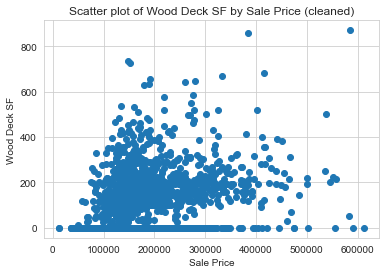

In [36]:
# plot overview of Wood deck sf by saleprice for overview
plt.scatter(train_df['SalePrice'], train_df['Wood Deck SF'])
plt.xlabel('Sale Price')
plt.ylabel('Wood Deck SF')
plt.title('Scatter plot of Wood Deck SF by Sale Price (cleaned)');

### 5.5. Misc Val

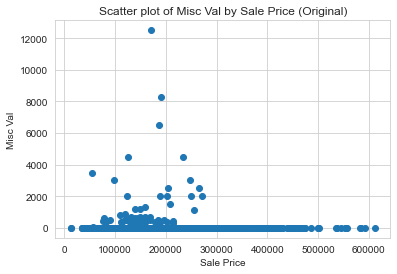

In [37]:
#Investigate Misc Val by Saleprice
plt.scatter(train_df['SalePrice'], train_df['Misc Val'])
plt.xlabel('Sale Price')
plt.ylabel('Misc Val')
plt.title('Scatter plot of Misc Val by Sale Price (Original)');

In [38]:
# observe no. of null values
train_df['Misc Val'].value_counts().head()

0      1982
400      12
500       7
600       6
450       5
Name: Misc Val, dtype: int64

In [39]:
train_df.shape

(2045, 79)

In [40]:
# we will drop this column due to the high number of null value.
train_df.drop(columns = 'Misc Val', inplace = True)

In [41]:
#check
train_df.shape

(2045, 78)

## 6. Categorical Cleaning and Imputation

### 6.1 Nominal 

- Nominal variables are types of data used to label variables without providing any quantitive values. hence i will  perform a one hot encoding for nominal variable columns
- However i will first conduct appropiate imputation values for nominal variables with null values or drop the columns when necessary


#### Identify Nominal variables with null values

In [42]:
# set nominal var
nominal_var = ['MS SubClass', 'MS Zoning', 'Street',
                            'Alley', 'Land Contour', 'Lot Config', 'Neighborhood',
                            'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                             'Roof Style', 'Roof Matl', 'Exterior 1st',
                             'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
                             'Heating', 'Central Air',
                             'Garage Type', 'Misc Feature', 'Sale Type'
                            ]

In [43]:
# verify nominal var cols in order
train_df[nominal_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MS SubClass   2045 non-null   int64 
 1   MS Zoning     2045 non-null   object
 2   Street        2045 non-null   object
 3   Alley         140 non-null    object
 4   Land Contour  2045 non-null   object
 5   Lot Config    2045 non-null   object
 6   Neighborhood  2045 non-null   object
 7   Condition 1   2045 non-null   object
 8   Condition 2   2045 non-null   object
 9   Bldg Type     2045 non-null   object
 10  House Style   2045 non-null   object
 11  Roof Style    2045 non-null   object
 12  Roof Matl     2045 non-null   object
 13  Exterior 1st  2045 non-null   object
 14  Exterior 2nd  2045 non-null   object
 15  Mas Vnr Type  2023 non-null   object
 16  Foundation    2045 non-null   object
 17  Heating       2045 non-null   object
 18  Central Air   2045 non-null   object
 19  Garage

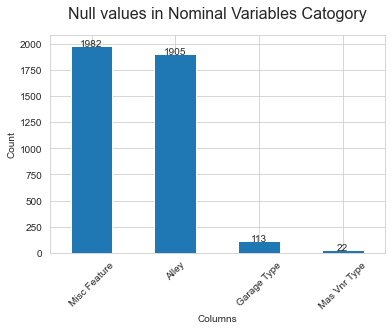

In [44]:
#check null values
nom_null = train_df[nominal_var].isnull().sum().sort_values(ascending = False)
nom_null = nom_null[nom_null > 0]
nom_null.plot.bar()
plt.title('Null values in Nominal Variables Catogory', fontsize = 16, y = 1.05)

for index, value in enumerate(nom_null):
    plt.text(index, value,  str(value), horizontalalignment='center')
    
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Count');

#### Identified nominal variables with null values for cleaning/imputation
- Alley
- Mas Vnr Type
- Garage Type
- Misc Feature

#### 6.1.1. Drop Alley, Misc Feature

In [45]:
train_df.shape

(2045, 78)

In [46]:
# We will drop Alley and Misc Feature due to the high volume of null values.
train_df.drop(columns = ['Misc Feature', 'Alley'], inplace = True)

In [47]:
# check
train_df.shape

(2045, 76)

#### 6.1.2. Filling in null Value in Mas Vnr Type, Garage Type' columns with None value

In [48]:
# Fill Nan Values in 'Alley', 'Mas Vnr Type', 'Garage Type', 'Misc feature' columns with Null value
train_df[[ 'Mas Vnr Type', 'Garage Type']] = train_df[['Mas Vnr Type', 'Garage Type']].fillna('None') 

In [49]:
# check null values
train_df[['Mas Vnr Type', 'Garage Type']].isnull().sum().sum()

0

### 6.2 Ordinal 

#### Identify Ordinal variables with null values

In [50]:
#set ordinal var
ordinal_var = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual','Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual',
                      'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual',
                      'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

In [51]:
train_df[ordinal_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2045 non-null   object
 1   Utilities       2045 non-null   object
 2   Land Slope      2045 non-null   object
 3   Overall Qual    2045 non-null   int64 
 4   Overall Cond    2045 non-null   int64 
 5   Exter Qual      2045 non-null   object
 6   Exter Cond      2045 non-null   object
 7   Bsmt Qual       1990 non-null   object
 8   Bsmt Cond       1990 non-null   object
 9   Bsmt Exposure   1987 non-null   object
 10  BsmtFin Type 1  1990 non-null   object
 11  BsmtFin Type 2  1989 non-null   object
 12  Heating QC      2045 non-null   object
 13  Electrical      2045 non-null   object
 14  Kitchen Qual    2045 non-null   object
 15  Functional      2045 non-null   object
 16  Fireplace Qu    1045 non-null   object
 17  Garage Finish   1931 non-null   object
 18  Garage Q

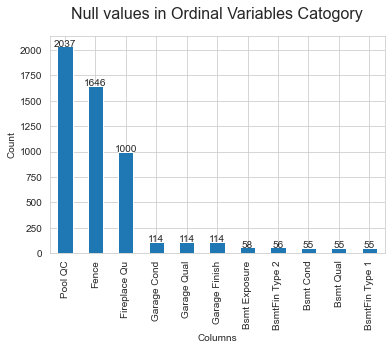

In [52]:
#check null values
ord_null = train_df[ordinal_var].isnull().sum().sort_values(ascending = False)
ord_null = ord_null[ord_null > 0]
ord_null.plot.bar()
plt.title('Null values in Ordinal Variables Catogory', fontsize = 16, y = 1.05)

for index, value in enumerate(ord_null):
    plt.text(index, value,  str(value), horizontalalignment='center')
    
plt.xticks()
plt.xlabel('Columns')
plt.ylabel('Count');

#### Identified ordinal variables with null values for cleaning/imputation

- Bsmt Qual           
- Bsmt Cond           
- Bsmt Exposure       
- BsmtFin Type 1      
- BsmtFin Type 2
- Fireplace Qu      
- Garage Finish      
- Garage Qual        
- Garage Cond
- Pool QC           
- Fence

#### 6.2.1 Basement columns

- We will investigate the basement columns of the ordnial variables concurently as it seems that they are related to each other
- We will take reference from 'Bsmt Exposure' to find out if house is fitted with any basement at all

In [53]:
train_df['Bsmt Exposure'].value_counts()
# NA: No Basment, No: No exposure, Mn: Minimum Exposure, AV: Average Exposure, Gd: Good Exposure

No    1339
Av     288
Gd     197
Mn     163
Name: Bsmt Exposure, dtype: int64

In [54]:
train_df['Bsmt Exposure'].isnull().sum()

# there are 58 null value variables in 'Bsmt Exposure' meaning there are 58 house without Basements

58

In [55]:
# now do comparisons with the other Bsmt related columns
bsmt_null_val = train_df[train_df['Bsmt Exposure'].isnull() == True]
bsmt_null_val[['Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2']]

,Bsmt Exposure,Bsmt Qual,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2
12,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN
437,NaN,NaN,NaN,NaN,NaN


- We can observe that most of the other related basment variables to the basement exposure is reflective of houses with no basement. however there are 3 rows (index: 1456, 1547, 1997) indicates other values otherwise. since they are indicative of unfinished value, we will treat them as no basement variable.

In [56]:
# filling in null-values of basement columns with None Value 
train_df[['Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2']] = train_df[['Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna('None')

In [57]:
# check
train_df[['Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2']].isnull().sum()

Bsmt Exposure     0
Bsmt Qual         0
Bsmt Cond         0
BsmtFin Type 1    0
BsmtFin Type 2    0
dtype: int64

#### 6.2.2 Fireplace Qu 

In [58]:
# Explore value counts of 'Fireplace Qu'
train_df['Fireplace Qu'].isnull().sum()

1000

In [59]:
train_df.shape

(2045, 76)

In [60]:
# we will drop Fireplace Qu due to the high volumn of null values
train_df.drop(columns = 'Fireplace Qu', inplace = True)

In [61]:
train_df.shape

(2045, 75)

#### 6.2.3 Fill Garage Nan columns with None values

- We will investigate the Garage columns variables concurently as it seems that they are related to each other
- We will reference 'Garage Type' from the nominal variable to investigate if the house has is fitted with any Garage

In [62]:
no_garage = train_df[train_df['Garage Type'] == 'None']

In [63]:
no_garage[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
28,None,NaN,NaN,NaN
53,None,NaN,NaN,NaN
65,None,NaN,NaN,NaN
79,None,NaN,NaN,NaN
101,None,NaN,NaN,NaN
...,...,...,...,...
1991,None,NaN,NaN,NaN
2010,None,NaN,NaN,NaN
2027,None,NaN,NaN,NaN
2039,None,NaN,NaN,NaN


- We can observe that the related Garage values are Nan because there is no garage in the house. Therefore, we are able to convert the value to None.

In [64]:
# filling null values in 'Garage Finish', 'Garage Qual', 'Garage Cond' with None Value
train_df[['Garage Finish', 'Garage Qual', 'Garage Cond']] = train_df[['Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('None')

In [65]:
# Check
train_df[['Garage Finish', 'Garage Qual', 'Garage Cond']].isnull().sum()

Garage Finish    0
Garage Qual      0
Garage Cond      0
dtype: int64

#### 6.2.4 Drop 'Pool QC and 'Fence' columns

In [66]:
# Explore null value of 'Pool QC'
train_df['Pool QC'].isnull().sum()

2037

In [67]:
# Explore null value of 'Pool QC'
train_df['Fence'].isnull().sum()

1646

In [68]:
train_df.shape

(2045, 75)

In [69]:
# we will drop these 2 columns due to high volume of null values
train_df.drop(columns = ['Pool QC', 'Fence'], inplace = True)

In [70]:
# check
train_df.shape

(2045, 73)

### 6.3 Continous variables  (not including sale price)

In [71]:
# Identify Continous variables with null values (not including sale price)
cont_var = ['Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
            'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
            'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 
            '3Ssn Porch', 'Screen Porch', 'Pool Area']

In [72]:
train_df[cont_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     1718 non-null   float64
 1   Lot Area         2045 non-null   int64  
 2   Mas Vnr Area     2023 non-null   float64
 3   BsmtFin SF 1     2044 non-null   float64
 4   BsmtFin SF 2     2044 non-null   float64
 5   Bsmt Unf SF      2044 non-null   float64
 6   Total Bsmt SF    2044 non-null   float64
 7   1st Flr SF       2045 non-null   int64  
 8   2nd Flr SF       2045 non-null   int64  
 9   Low Qual Fin SF  2045 non-null   int64  
 10  Gr Liv Area      2045 non-null   int64  
 11  Garage Area      2044 non-null   float64
 12  Wood Deck SF     2045 non-null   int64  
 13  Open Porch SF    2045 non-null   int64  
 14  Enclosed Porch   2045 non-null   int64  
 15  3Ssn Porch       2045 non-null   int64  
 16  Screen Porch     2045 non-null   int64  
 17  Pool Area     

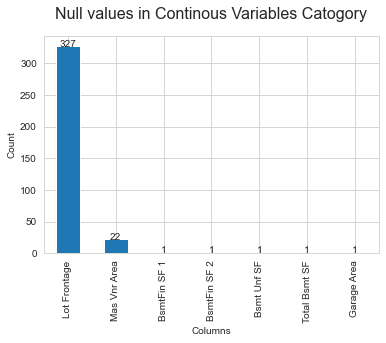

In [73]:
#check null values
cont_null = train_df[cont_var].isnull().sum().sort_values(ascending = False)
cont_null  = cont_null[cont_null> 0]
cont_null .plot.bar()
plt.title('Null values in Continous Variables Catogory', fontsize = 16, y = 1.05)

for index, value in enumerate(cont_null ):
    plt.text(index, value,  str(value), horizontalalignment='center')
    
plt.xticks()
plt.xlabel('Columns')
plt.ylabel('Count');

#### Identified Continous variables with null values for cleaning/imputation

- Lot Frontage
- Mas Vnr Area 
- BsmtFin SF 1
- BsmtFin SF 2         
- Bsmt Unf SF          
- Total Bsmt SF
- Garage Area

#### 6.3.1 Lot Frontage imputation with mean value

- There are 330 null value variables in 'Lot Frontage'. we cannot drop or input 0 value for these variables as they will may potentially affect out modelling. therefore i will conduct a mean imputation for the missing values.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


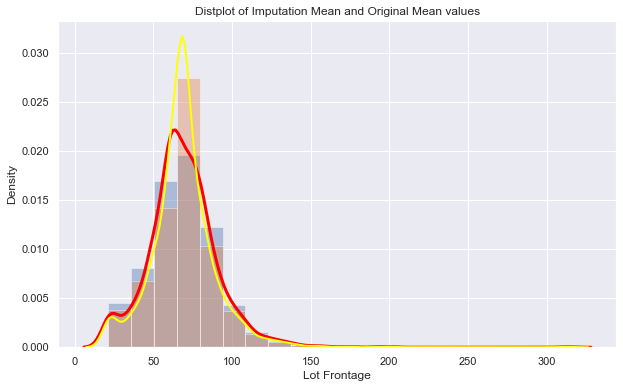

In [74]:
plt.figure(figsize = (10,6))
sns.set()

sns.distplot(train_df['Lot Frontage'], bins = 20, kde_kws = {'linewidth': 3, 'color':'red'}, label = 'original')
sns.distplot(train_df['Lot Frontage'].fillna(train_df['Lot Frontage'].mean()), bins = 20, kde_kws = {'linewidth': 2, 'color': 'yellow'}, label = 'mean')
plt.title('Distplot of Imputation Mean and Original Mean values');

- Inputing the null values with the mean method seems like a good fit for imputation however variance density has been tweeked. our confidence level may be get smaller. however we will still use this method as the best assessed imputation of the 330 variables using means of the Lot Frontage.

In [75]:
# filling in null values of 'Lot Frontage' with mean of 'Lot Frontage'
train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(train_df['Lot Frontage'].mean())

In [76]:
# Check
train_df['Lot Frontage'].isnull().sum()

0

#### 6.3.2 Mas Vnr Area fill with 0 value

- Since the no of null values in Mas Vnr Area is small(about 1% of the total data), we shall convert the null value to 0

In [77]:
# Filling in Null value in 'Mas Vnr Area' with 0 value.
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0)

In [78]:
#check
train_df['Mas Vnr Area'].isnull().sum()

0

####  6.3.3 Basment Nan columns impute with 0 value

- We will investigate the Basement columns of the Continous variables concurently as it seems that they are related to each other
- We will reference 'Basement Exposure' from the Ordinal variable to investigate if the house has is fitted with any Basement

In [79]:
no_bsmt = train_df[train_df['Bsmt Exposure'] == 'None']

In [80]:
no_bsmt[['Bsmt Exposure', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']]

,Bsmt Exposure,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
12,None,0.0,0.0,0.0,0.0
93,None,0.0,0.0,0.0,0.0
114,None,0.0,0.0,0.0,0.0
146,None,0.0,0.0,0.0,0.0
183,None,0.0,0.0,0.0,0.0
240,None,0.0,0.0,0.0,0.0
249,None,0.0,0.0,0.0,0.0
256,None,0.0,0.0,0.0,0.0
390,None,0.0,0.0,0.0,0.0
437,None,0.0,0.0,0.0,0.0


- We can observe that most of the other related basment variables to the basement exposure is reflective of houses with no basement. however there are 3 rows (index: 1456, 1547, 1997) indicates other values otherwise. since they are indicative of unfinished value and given the small number of nominal value which will not affect our modelling, we will treat them as no basement variable.

In [81]:
# filling in null value of 'Bsmt Exposure', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF' with 0 value
train_df[['Bsmt Exposure', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']] = train_df[['Bsmt Exposure', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].fillna(0)


In [82]:
# Check
train_df[['Bsmt Exposure', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().sum().sum()

0

#### 6.3.4 Garage Area null column fill with 0 value

- Since 'Garage Area' has only 1 missin value each, we will replace this value with 0

In [83]:
# filling in null value with 0
train_df['Garage Area'] = train_df['Garage Area'].fillna(0)

In [84]:
#Check
train_df['Garage Area'].isnull().sum()

0

### 6.4 Discrete variables cleaning

In [85]:
dis_var = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath',
          'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr','TotRms AbvGrd', 'Fireplaces',
          'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'Yr Sold']

In [86]:
train_df[dis_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 2050
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2045 non-null   int64  
 1   Year Remod/Add  2045 non-null   int64  
 2   Bsmt Full Bath  2043 non-null   float64
 3   Bsmt Half Bath  2043 non-null   float64
 4   Full Bath       2045 non-null   int64  
 5   Half Bath       2045 non-null   int64  
 6   Bedroom AbvGr   2045 non-null   int64  
 7   Kitchen AbvGr   2045 non-null   int64  
 8   TotRms AbvGrd   2045 non-null   int64  
 9   Fireplaces      2045 non-null   int64  
 10  Garage Yr Blt   1931 non-null   float64
 11  Garage Cars     2044 non-null   float64
 12  Mo Sold         2045 non-null   int64  
 13  Yr Sold         2045 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 239.6 KB


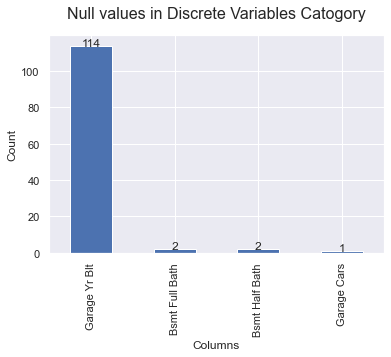

In [87]:
#check null values
dis_null = train_df[dis_var].isnull().sum().sort_values(ascending = False)
dis_null  = dis_null[dis_null> 0]

dis_null.plot.bar()
plt.title('Null values in Discrete Variables Catogory', fontsize = 16, y = 1.05)

for index, value in enumerate(dis_null ):
    plt.text(index, value,  str(value), horizontalalignment='center')
    
plt.xticks()
plt.xlabel('Columns')
plt.ylabel('Count');


#### Identified Continous variables with null values for cleaning/imputation

- Bsmt Full Bath      
- Bsmt Half Bath
- Garage Yr Blt     
- Garage Cars

#### 6.4.1 Basment Bath columns fill with 0 value

- Since 'Bsmt Full Bath', 'Bsmt Half Bath' has only 2 missing value each, we will replace these value with 0

In [88]:
# Fill null value with 0
train_df[['Bsmt Full Bath', 'Bsmt Half Bath']] = train_df[['Bsmt Full Bath', 'Bsmt Half Bath']].fillna(0)

In [89]:
# Check
train_df[['Bsmt Full Bath', 'Bsmt Half Bath']].isnull().sum()

Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

#### 6.4.2 Garage Yr Built null value fill with yr built

- We have 114 missing data in this column. It will be relevant for us to input the missing value with the year of the house built instead of using other methods of imputing.

In [90]:
# Filling in null value with year build of house
train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(train_df['Year Built'])

In [91]:
train_df['Garage Yr Blt'].isnull().sum()

0

#### 6.4.3 Garage Cars null value fill with 0 value

- Since 'Garage Car' has only 1 missin value each, we will replace this value with 0

In [92]:
train_df['Garage Cars'] = train_df['Garage Cars'].fillna(0)

In [93]:
train_df['Garage Cars'].isnull().sum()

0

### 6.5 Final check for train_df if there is any null values

In [94]:
#check
train_df.isnull().sum().sum()

0

In [95]:
train_df.shape

(2045, 73)

### 6.6 Test Set Data (test_df)

In [96]:
# explore dtypes of test_df
test_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [97]:
test_df.isnull().sum().sort_values(ascending = False).head(20)

Pool QC           874
Misc Feature      837
Alley             820
Fence             706
Fireplace Qu      422
Lot Frontage      160
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Garage Type        44
BsmtFin Type 1     25
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 2     25
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Kitchen Qual        0
dtype: int64

- There are similar multiple columns with null values in the test_df. we will apply what we have data cleaned/imputation in the train_df to the test_df

### 6.7 Data cleaning for test_df

In [98]:
# Drop 'Misc Val Col'
test_df.drop(columns = 'Misc Val', inplace = True)

# filling in null values of 'Lot Frontage' with mean of 'Lot Frontage'
test_df['Lot Frontage'] = test_df['Lot Frontage'].fillna(np.mean(test_df['Lot Frontage']))

# Drop 'Alley', 'Misc Feature'
test_df.drop(columns = ['Misc Feature', 'Alley'], inplace = True)

# Mas Vnr Type', 'Garage Type'
test_df[['Mas Vnr Type', 'Garage Type']] = test_df[[ 'Mas Vnr Type', 'Garage Type']].fillna('None')

#'Mas Vnr Area'
test_df['Mas Vnr Area'] = test_df['Mas Vnr Area'].fillna(0)

# 'Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2'
test_df[['Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2']] = test_df[['Bsmt Exposure','Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna('None')

# 'Fireplace Qu'
test_df['Fireplace Qu'] = test_df['Fireplace Qu'].fillna('None')

# 'Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond'
test_df[['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']] = test_df[['Garage Type','Garage Finish', 'Garage Qual', 'Garage Cond']].fillna('None')

# 'Garage Yr Blt'
test_df['Garage Yr Blt'] = test_df['Garage Yr Blt'].fillna(test_df['Year Built'])

# Drop Fireplace Qu
test_df.drop(columns = 'Fireplace Qu', inplace = True)

# Drop 'Pool QC', 'Fence'
test_df.drop(columns = ['Pool QC', 'Fence'], inplace = True)



In [99]:
# Check any more isnull values in test_df
test_df.isnull().sum().sort_values(ascending = False).head()

Electrical        1
Id                0
Bsmt Half Bath    0
TotRms AbvGrd     0
Kitchen Qual      0
dtype: int64

- Electrical col indicated a null value. this was not reflected in the train_df. we will proceed to fill this values with None Value since it is a single null variable

#### 6.7.1 Electrical

In [100]:
test_df['Electrical'] = test_df['Electrical'].fillna('None')

### 6.8 Final Check for test_df for any null values

In [101]:
test_df.isnull().sum().sum()

0

In [102]:
test_df.shape

(878, 73)

### 6.9 Pair Plot of numerical cleaned data

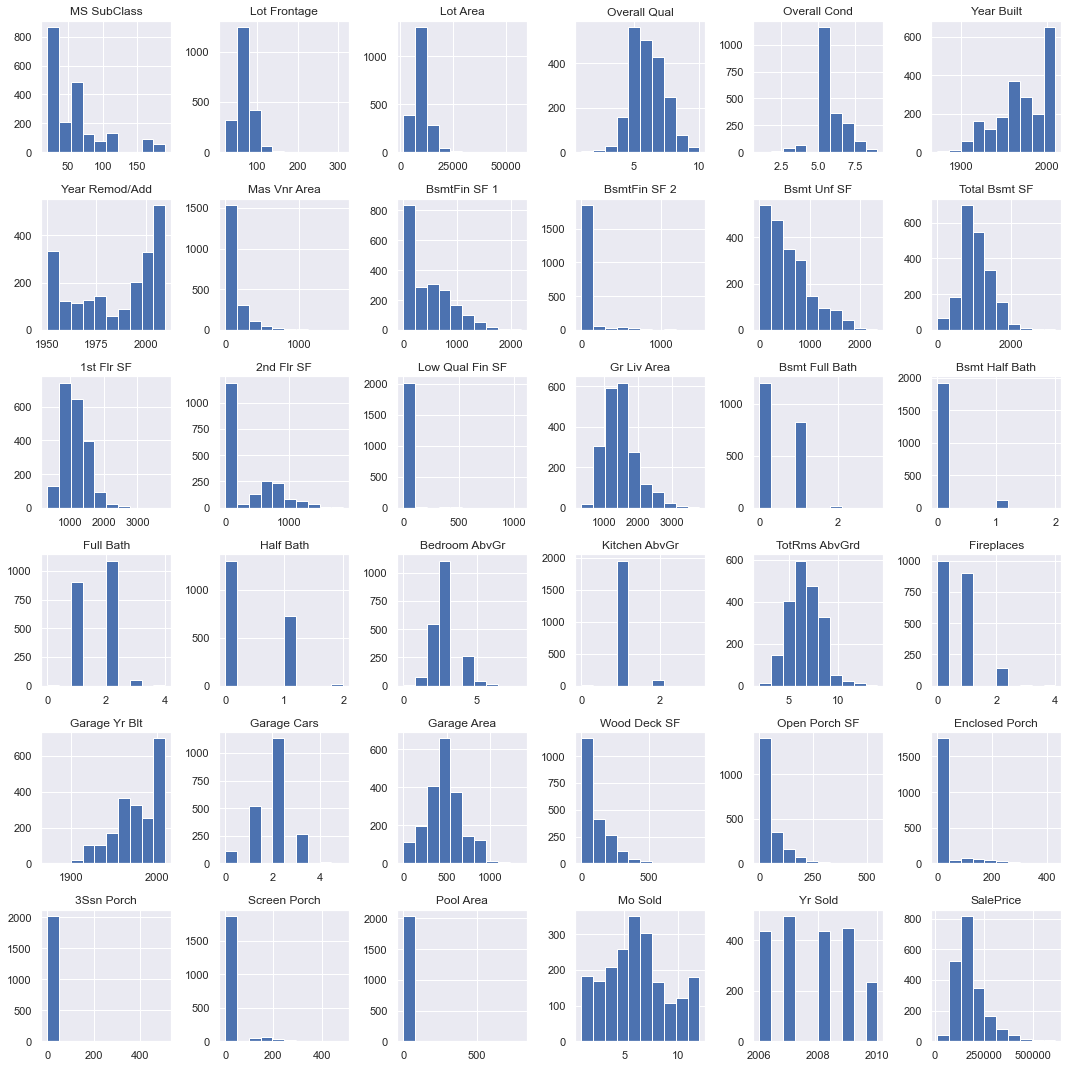

In [103]:
# Plot Histrogram to explore our numerical cleaned data
train_df.hist(figsize = (15,15))
plt.tight_layout();

- We noticed the following columns with high number of 0 values:

1. Low Qual Fin SF
2. 3Ssn Porch
3. Screen Porch
4. Pool Area
5. Enclosed Porch

- We will drop these columns as it is assessed that they are likely to have no predictive values features for our prediction as they have too little value to cause any change in the prediction model.

#### 6.10 Drop Low Qual Fin SF, 3Ssn Porch, Screen Porch, Pool Area, Enclosed Porch columns

In [104]:
# dropping columns
train_df.drop(['Low Qual Fin SF', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Enclosed Porch'], axis = 1, inplace = True)

In [105]:
train_df.shape

(2045, 68)

In [106]:
# drop columns in test_df
test_df.drop(['Low Qual Fin SF', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Enclosed Porch'], axis = 1, inplace = True)

In [107]:
test_df.shape

(878, 68)

## 7. Feature Engineering

- Our data for both train and test file is now cleaned of null values and outliers. we will now conduct pre processing for features enginnering for our data sets.
- We will be using dummify method for our Nominal variables. as these variables are data types  used to label variables without providing any quantative values.
- For our Ordinal variables, we will be using mapping method. as this variables are catagorial stat data type.

### 7.1 One hot encoding for Nominal variables

In [108]:
b = ['Alley', 'Misc Feature']
nominal_var = [col for col in nominal_var if col not in b]

In [109]:
# dummify nominal variables of train_df
train_df = pd.get_dummies(train_df, columns = nominal_var, drop_first = True)

In [110]:
train_df.head()

,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,68.883003,13517,IR1,AllPub,Gtl,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,43.000000,11492,IR1,AllPub,Gtl,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,68.000000,7922,Reg,AllPub,Gtl,5,7,1953,2007,0.0,...,1,0,0,0,0,0,0,0,0,1
3,73.000000,9802,Reg,AllPub,Gtl,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,82.000000,14235,IR1,AllPub,Gtl,6,8,1900,1993,0.0,...,1,0,0,0,0,0,0,0,0,1


### 7.2 Mapping Ordinal Variables 

#### 7.2.1  'Lot Shape'

In [111]:
train_df['Lot Shape'].value_counts()

Reg    1295
IR1     689
IR2      53
IR3       8
Name: Lot Shape, dtype: int64

We will assign the following values to the following according to their irregularities:
- Reg : 0
- IR1 : 1
- IR2 : 2
- IR3 : 3

In [112]:
train_df['Lot Shape'] = train_df['Lot Shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3':3})

In [113]:
train_df['Lot Shape'].value_counts()

0    1295
1     689
2      53
3       8
Name: Lot Shape, dtype: int64

#### 7.2.2 'Utilities'

In [114]:
train_df['Utilities'].value_counts()

AllPub    2043
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

We will assign the following values according to the type of utilities available:
- AllPub : 0
- NoSeWa : 1
- NoSewr : 2
- ELO :3

In [115]:
train_df['Utilities'] = train_df['Utilities'].map({'AllPub': 0, 'NoSeWa' : 1, 'NoSewr': 2, 'ELO' : 3})

In [116]:
train_df['Utilities'].value_counts()

0    2043
1       1
2       1
Name: Utilities, dtype: int64

#### 7.2.3 'Land Slope'

In [117]:
train_df['Land Slope'].value_counts()

Gtl    1951
Mod      86
Sev       8
Name: Land Slope, dtype: int64

We will assign the following values according to the type of slopes:
- Gtl : 0
- Mod : 1
- Sev : 2

In [118]:
train_df['Land Slope'] = train_df['Land Slope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})

In [119]:
train_df['Land Slope'].value_counts()

0    1951
1      86
2       8
Name: Land Slope, dtype: int64

#### 7.2.4 'Overall Qual', 'Overall Cond'

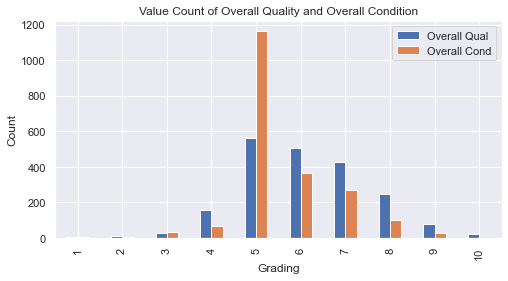

In [120]:
overall_cond_qual = (train_df['Overall Qual'].value_counts().to_frame().join(train_df['Overall Cond'].value_counts().to_frame()).sort_index())
overall_cond_qual.plot(kind = 'bar', figsize = (8,4))
plt.title('Value Count of Overall Quality and Overall Condition')
plt.xlabel('Grading')
plt.ylabel('Count');

- We can observe that these ordinal variables columns are already assigned values. therefore there is no need to do a mapping for these columns

#### 7.2.5 'Exter Qual', 'Exter Cond', 'Heating QC', 'Kitchen Qual'

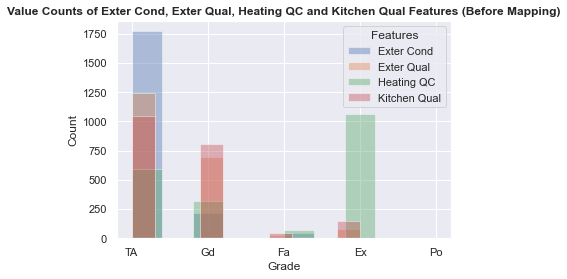

In [121]:
# plotting hist to have overview of Exter Qual, Exter Cond, Heating QC and Kitchen Qual value counts
plt.hist(train_df['Exter Cond'], alpha =.4, label = 'Exter Cond')
plt.hist(train_df['Exter Qual'], alpha =.4, label = 'Exter Qual')
plt.hist(train_df['Heating QC'], alpha =.4, label = 'Heating QC')
plt.hist(train_df['Kitchen Qual'], alpha =.4, label = 'Kitchen Qual')
plt.legend(title='Features')
plt.title('Value Counts of Exter Cond, Exter Qual, Heating QC and Kitchen Qual Features (Before Mapping)', fontsize = 12, fontweight = 'heavy')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


These 4 columns are utilising similar scale for the catagorical data. therefore we will map the same values of the data for these columns. we will also map the TA(average/typical) with the value of 0 as reference value
- Ex : 2   
- Gd : 1    
- TA : 0     
- Fa : -1      
- Po : -2

In [122]:
for val in ['Exter Qual', 'Exter Cond', 'Heating QC','Kitchen Qual']:
    train_df[val] = train_df[val].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po' : -2})

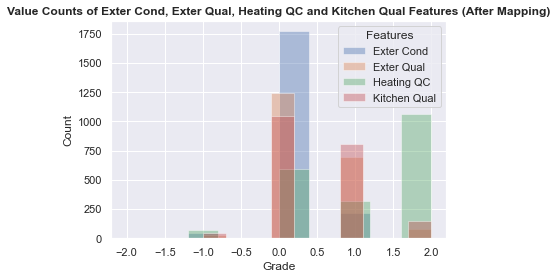

In [123]:
#plotting hist of Exter Cond, Exter Qual, Heating QC and Kitchen Qual to check mapping
plt.hist(train_df['Exter Cond'], alpha =.4, label = 'Exter Cond')
plt.hist(train_df['Exter Qual'], alpha =.4, label = 'Exter Qual')
plt.hist(train_df['Heating QC'], alpha =.4, label = 'Heating QC')
plt.hist(train_df['Kitchen Qual'], alpha =.4, label = 'Kitchen Qual')
plt.legend(title='Features')
plt.title('Value Counts of Exter Cond, Exter Qual, Heating QC and Kitchen Qual Features (After Mapping)', fontsize = 12, fontweight = 'heavy')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

#### 7.2.6 'BsmtFin Type 1', 'BsmtFin Type 2'

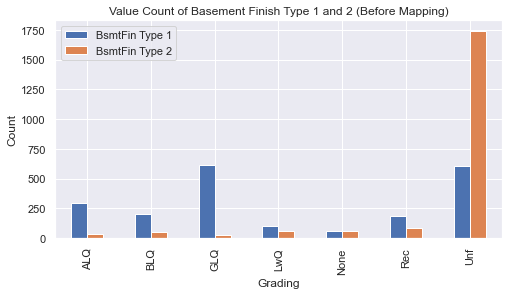

In [124]:
bsmtfin_type = (train_df['BsmtFin Type 1'].value_counts().to_frame().join(train_df['BsmtFin Type 2'].value_counts().to_frame()).sort_index())
bsmtfin_type.plot(kind = 'bar', figsize = (8,4))
plt.title('Value Count of Basement Finish Type 1 and 2 (Before Mapping)')
plt.xlabel('Grading')
plt.ylabel('Count');

These 2 columns are utilising similar scale for the catagorical data. therefore we will map the same values of the data for these columns. we will also map the None value with the value of 0 
- GLQ : 6
- ALQ : 5
- BLQ : 4
- Rec : 3
- LwQ : 2
- Unf : 1
- None : 0

In [125]:
for val in ['BsmtFin Type 1', 'BsmtFin Type 2']:
    train_df[val] = train_df[val].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ' : 2, 'Unf': 1, 'None': 0})

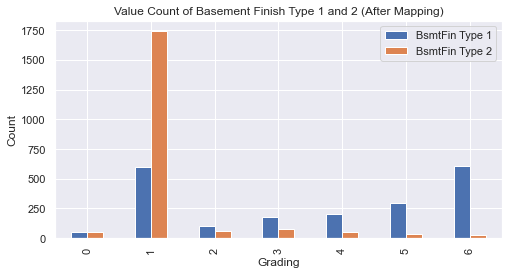

In [126]:
bsmtfin_type = (train_df['BsmtFin Type 1'].value_counts().to_frame().join(train_df['BsmtFin Type 2'].value_counts().to_frame()).sort_index())
bsmtfin_type.plot(kind = 'bar', figsize = (8,4))
plt.title('Value Count of Basement Finish Type 1 and 2 (After Mapping)')
plt.xlabel('Grading')
plt.ylabel('Count');

#### 7.2.7 'Bsmt Qual', 'Bsmt Cond', 'Garage Cond', 'Garage Qual'

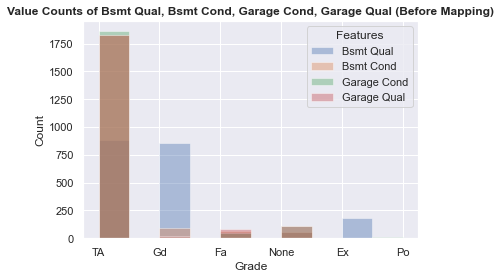

In [127]:
#plotting hist of 'Bsmt Qual', 'Bsmt Cond', 'Garage Cond', 'Garage Qual', 'Fireplace Qu' to check value counts
plt.hist(train_df['Bsmt Qual'], alpha =.4, label = 'Bsmt Qual')
plt.hist(train_df['Bsmt Cond'], alpha =.4, label = 'Bsmt Cond')
plt.hist(train_df['Garage Cond'], alpha =.4, label = 'Garage Cond')
plt.hist(train_df['Garage Qual'], alpha =.4, label = 'Garage Qual')

plt.legend(title='Features')
plt.title('Value Counts of Bsmt Qual, Bsmt Cond, Garage Cond, Garage Qual (Before Mapping)', fontsize = 12, fontweight = 'heavy')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

These 4 columns are utilising similar scale for the catagorical data. therefore we will map the same values of the data for these columns. we will also map the None value with the value of 0 
- Ex : 5
- Gd : 4
- TA : 3
- Fa : 2
- Po : 1
- None : 0

In [128]:
for val in ['Bsmt Qual', 'Bsmt Cond', 'Garage Cond', 'Garage Qual' ]:
    train_df[val] = train_df[val].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po' : 1, 'None': 0})

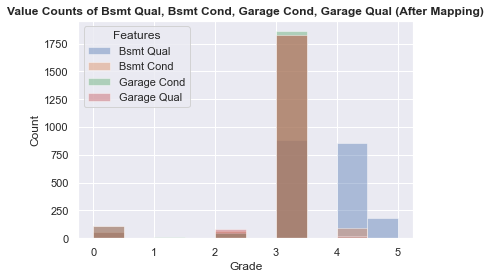

In [129]:
#plotting hist of 'Bsmt Qual', 'Bsmt Cond', 'Garage Cond', 'Garage Qual', 'Fireplace Qu' to check value counts
plt.hist(train_df['Bsmt Qual'], alpha =.4, label = 'Bsmt Qual')
plt.hist(train_df['Bsmt Cond'], alpha =.4, label = 'Bsmt Cond')
plt.hist(train_df['Garage Cond'], alpha =.4, label = 'Garage Cond')
plt.hist(train_df['Garage Qual'], alpha =.4, label = 'Garage Qual')

plt.legend(title='Features')
plt.title('Value Counts of Bsmt Qual, Bsmt Cond, Garage Cond, Garage Qual (After Mapping)', fontsize = 12, fontweight = 'heavy')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

#### 7.2.8 'Garage Finish'

In [130]:
train_df['Garage Finish'].value_counts()

Unf     847
RFn     579
Fin     505
None    114
Name: Garage Finish, dtype: int64

We will assign the following values according to the type of Exposure:
- Fin : 3
- RFn : 2
- Unf : 1
- None : 0

In [131]:
train_df['Garage Finish'] = train_df['Garage Finish'].map({'Fin':3,'RFn':2, 'Unf':1, 'None':0})
train_df['Garage Finish'].value_counts()

1    847
2    579
3    505
0    114
Name: Garage Finish, dtype: int64

#### 7.2.9 'Bsmt Exposure'

In [132]:
train_df['Bsmt Exposure'].value_counts()

No      1339
Av       288
Gd       197
Mn       163
None      58
Name: Bsmt Exposure, dtype: int64

We will assign the following values according to the type of Exposure:
- Gd : 4
- Av : 3
- Mn : 2
- No : 1
- None : 0

In [133]:
train_df['Bsmt Exposure'] = train_df['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn':2, 'No':1, 'None': 0})
train_df['Bsmt Exposure'].value_counts()

1    1339
3     288
4     197
2     163
0      58
Name: Bsmt Exposure, dtype: int64

#### 7.2.10 'Electrical'

In [134]:
train_df['Electrical'].value_counts()

SBrkr    1862
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

We will assign the following values according to the type of Electical System:
- SBrkr : 4
- FuseA : 3
- FuseF : 2
- FuseP : 1
- Mix : 0

In [135]:
train_df['Electrical'] = train_df['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF':2, 'FuseP':1, 'Mix': 0})
train_df['Electrical'].value_counts()

4    1862
3     140
2      35
1       7
0       1
Name: Electrical, dtype: int64

#### 7.2.11 'Functional'

In [136]:
train_df['Functional'].value_counts()

Typ     1909
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

We will assign the following values according to the Home Functionality:
- Typ  : 7
- Min1 : 6
- Min2 : 5
- Mod  : 4
- Maj1 : 3
- Maj2 : 2
- Sev  : 1
- Sal  : 0

In [137]:
train_df['Functional'] = train_df['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3,'Maj2':2, 'Sev':1,'Sal':0})
train_df['Functional'].value_counts()

7    1909
5      42
6      42
4      29
3      12
2       7
0       2
1       2
Name: Functional, dtype: int64

#### 7.2.12 'Paved Drive'

In [138]:
train_df['Paved Drive'].value_counts()

Y    1855
N     151
P      39
Name: Paved Drive, dtype: int64

We will assign the following values according to the Type of Paved drive way:
- Y: 2
- P: 1
- N: 0

In [139]:
train_df['Paved Drive'] = train_df['Paved Drive'].map({'Y': 2, 'P': 1, 'N': 0})
train_df['Paved Drive'].value_counts()

2    1855
0     151
1      39
Name: Paved Drive, dtype: int64

In [140]:
train_df.shape

(2045, 194)

### 7.3 Processing similar steps to test set ( test_df )

We will process our test df with the imputation done similarly with our train set.

In [141]:
test_df.shape

(878, 68)

In [142]:
#processing for test_df
test_df = pd.get_dummies(test_df, columns = nominal_var, drop_first = True)
test_df['Lot Shape'] = test_df['Lot Shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3':3})
test_df['Utilities'] = test_df['Utilities'].map({'AllPub': 0, 'NoSeWa' : 1, 'NoSewr': 2, 'ELO' : 3})
test_df['Land Slope'] = test_df['Land Slope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
for val in ['Exter Qual', 'Exter Cond', 'Heating QC','Kitchen Qual']:
    test_df[val] = test_df[val].map({'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po' : -2})
for val in ['BsmtFin Type 1', 'BsmtFin Type 2']:
    test_df[val] = test_df[val].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ' : 2, 'Unf': 1, 'None': 0})
for val in ['Bsmt Qual', 'Bsmt Cond', 'Garage Cond', 'Garage Qual' ]:
    test_df[val] = test_df[val].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po' : 1, 'None': 0})
test_df['Bsmt Exposure'] = test_df['Bsmt Exposure'].map({'Gd': 4, 'Av': 3, 'Mn':2, 'No':1, 'None': 0})
test_df['Electrical'] = test_df['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF':2, 'FuseP':1, 'Mix': 0})
test_df['Functional'] = test_df['Functional'].map({'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3,'Maj2':2, 'Sev':1,'Sal':0})
test_df['Paved Drive'] = test_df['Paved Drive'].map({'Y': 2, 'P': 1, 'N': 0})
test_df['Garage Finish'] = test_df['Garage Finish'].map({'Fin':3,'RFn':2, 'Unf':1, 'None':0})

In [143]:
# check
test_df.shape

(878, 186)

## 8. Export Cleaned Data

- our data is now cleaned and imputed. we will export the clean data sets for use for our data analysis.

In [144]:
train_df.to_csv('./datasets/train_clean.csv',index = False)
test_df.to_csv('./datasets/test_clean.csv', index = False)